In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from LinearRegression import LinearRegression

### Dataset Exploration

In [2]:
data_path = Path.cwd()
df_all = pd.read_csv(data_path / 'Life Expectancy Data.csv')
print(df_all.columns)
df_all.head(10)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [3]:
df = df_all[df_all['Status']=='Developing'].copy()
df.drop(['Year','Status'], axis=1, inplace=True)

In [4]:
df = df.groupby(by='Country').mean()
print(f'{df.dtypes}')
df

Life expectancy                    float64
Adult Mortality                    float64
infant deaths                      float64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                            float64
 BMI                               float64
under-five deaths                  float64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
Population                         float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object


,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,107.5625,48.3750,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250
Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,0.9375,98.1250,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750
Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,23.5000,91.7500,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250
Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,132.6250,46.1250,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375
Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,0.0000,96.9375,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,10.7500,74.6875,4.998667,68.5000,0.10000,NaN,NaN,1.65000,1.56250,0.726812,12.78750
Viet Nam,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,36.5000,94.9375,5.977333,91.7500,0.14375,NaN,NaN,14.92500,15.62500,0.627062,11.51250
Yemen,63.86250,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,51.6250,67.1250,5.005333,72.6250,0.10000,NaN,NaN,13.83125,13.75000,0.475500,8.50625


In [5]:
cols = ['Adult Mortality','infant deaths', 'GDP','Population','Life expectancy ']
df1 = df[cols]
df1

,Adult Mortality,infant deaths,GDP,Population,Life expectancy
Country,,,,,
Afghanistan,269.0625,78.2500,340.015425,9.972260e+06,58.19375
Albania,45.0625,0.6875,2119.726679,6.969116e+05,75.15625
Algeria,108.1875,20.3125,2847.853392,2.164983e+07,73.61875
Angola,328.5625,83.7500,1975.143045,1.014710e+07,49.01875
Antigua and Barbuda,127.5000,0.0000,9759.305728,NaN,75.05625
...,...,...,...,...,...
Venezuela (Bolivarian Republic of),163.0000,9.3750,NaN,NaN,73.38750
Viet Nam,126.5625,29.1875,NaN,NaN,74.77500
Yemen,211.8125,39.3750,NaN,NaN,63.86250


In [6]:
df1.describe()

,Adult Mortality,infant deaths,GDP,Population,Life expectancy
count,151.000000,161.000000,135.000000,1.190000e+02,151.000000
mean,182.833195,34.265528,4147.613805,1.382418e+07,67.111465
std,95.659171,123.193058,6543.983041,4.180748e+07,8.633224
min,18.750000,0.000000,136.183210,2.920000e+02,46.112500
25%,119.250000,0.500000,658.601705,8.477402e+05,60.543750
50%,160.375000,4.000000,2000.245518,3.722046e+06,69.300000
75%,232.250000,26.562500,4548.223703,1.130239e+07,73.709375
max,550.062500,1366.687500,40748.444104,4.214677e+08,82.218750


In [7]:
# sns.pairplot(df1)

<Axes: >

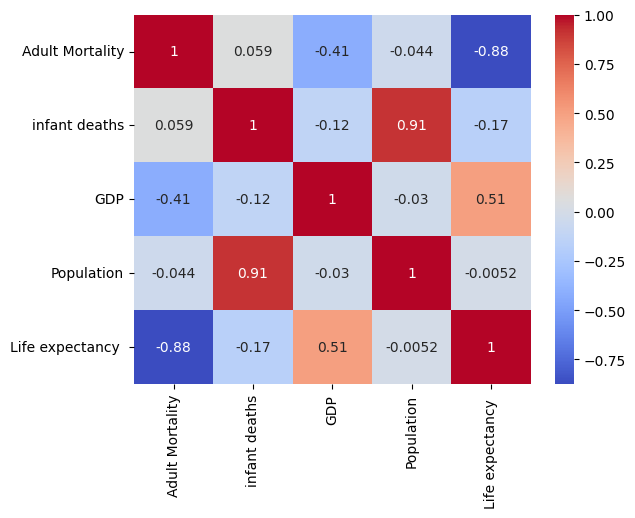

In [8]:
numeric_df = df1.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')

In [9]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# df1 = pd.DataFrame(scaler.fit_transform(df1), columns=cols)
# sns.violinplot(df1)

### Dataset cleaning

In [10]:
df=df1.copy()
for k in (df.columns):
    print(k, df[k].isnull().sum())

Adult Mortality 10
infant deaths 0
GDP 26
Population 42
Life expectancy  10


In [11]:
# Drop Nan values
df.dropna(axis=0, inplace=True)
countries = df.index

In [20]:
# Choose features to predict
feature_names = df.columns[0]
X, y = df[feature_names].to_numpy().reshape(-1,1), df[df.columns[-1]].to_numpy().reshape(-1,1)
print(f'Features: {feature_names}\n\t--> Shape: {X.shape}\nTarget: {df.columns[-1]}\n\t--> Shape: {y.shape}')
X

Features: Adult Mortality
	--> Shape: (117, 1)
Target: Life expectancy 
	--> Shape: (117, 1)


array([[269.0625],
       [ 45.0625],
       [108.1875],
       [328.5625],
       [106.    ],
       [117.375 ],
       [115.1875],
       [141.375 ],
       [218.75  ],
       [155.5   ],
       [269.375 ],
       [230.25  ],
       [ 64.9375],
       [448.125 ],
       [150.6875],
       [252.5   ],
       [291.5625],
       [116.1875],
       [196.375 ],
       [294.875 ],
       [ 64.625 ],
       [333.0625],
       [227.75  ],
       [ 63.625 ],
       [ 73.75  ],
       [124.25  ],
       [240.9375],
       [ 69.375 ],
       [274.6875],
       [143.5   ],
       [132.125 ],
       [155.0625],
       [279.375 ],
       [308.625 ],
       [169.6875],
       [285.5625],
       [125.    ],
       [ 68.875 ],
       [ 73.125 ],
       [220.4375],
       [114.9375],
       [180.0625],
       [ 73.625 ],
       [131.1875],
       [259.875 ],
       [158.3125],
       [203.9375],
       [168.3125],
       [142.    ],
       [146.5625],
       [166.5625],
       [136.75  ],
       [ 59.

### Linear Regression

Itération 000000: MSE=9.5539E+02

Fit process ended with success after 59 iterations
MSE = inf

Classic LinearRegression: R²=-inf

Model coefficients:
[[-2.51258691e+153]
 [-5.99957786e+155]]


C:\Appli\industrie4.0\conda\envs\ms\Lib\site-packages\LinearRegression\LinearRegression.py:40: RuntimeWarning: overflow encountered in square
  return np.square(y_pred - y_gt).sum() / (2*y_gt.shape[0])
C:\Appli\industrie4.0\conda\envs\ms\Lib\site-packages\LinearRegression\LinearRegression.py:77: RuntimeWarning: invalid value encountered in scalar subtract
  return np.abs((self.J[-1] - self.J[-2])/self.J[-2])
C:\Appli\industrie4.0\conda\envs\ms\Lib\site-packages\LinearRegression\LinearRegression.py:227: RuntimeWarning: overflow encountered in square
  return 1-(np.sum((y_gt-y_pred)**2)/np.sum((y_gt-np.mean(y_gt))**2))
C:\Appli\industrie4.0\conda\envs\ms\Lib\site-packages\matplotlib\scale.py:255: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


AttributeError: 'str' object has no attribute 'ndim'

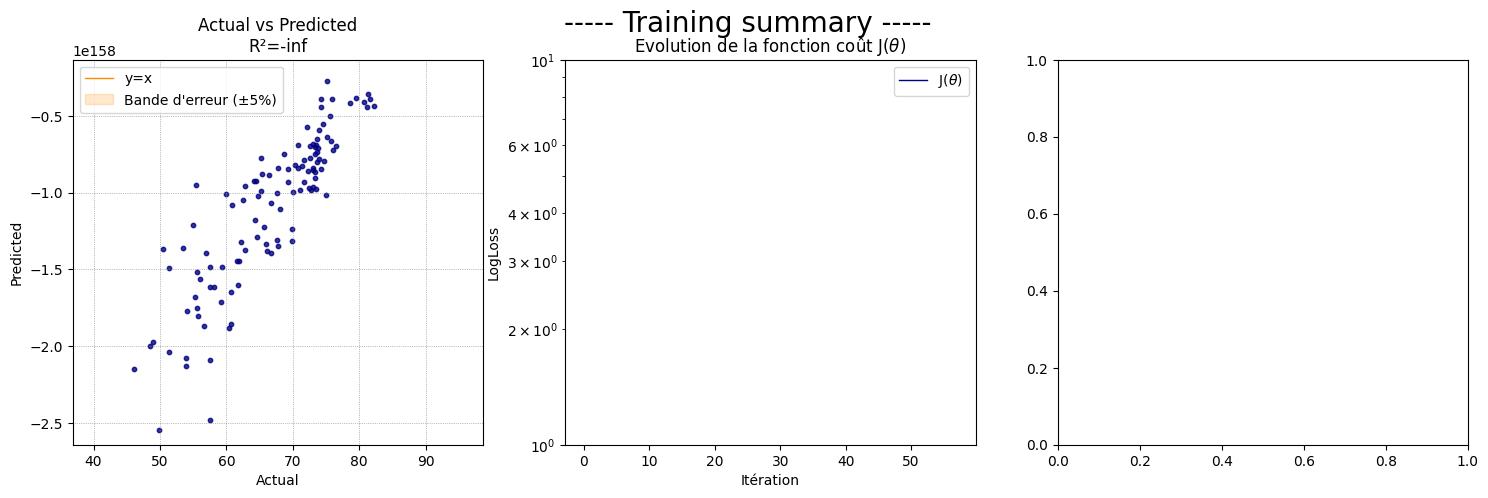

In [21]:
model = LinearRegression(lr=1e-2, eps=1e-12)
model.fit(X, y)
y_pred = model.predict(X)
print(f'Classic LinearRegression: R²={model.score(y, y_pred):.4f}')
print(f'\nModel coefficients:\n{model.best_params}')

plt.figure(figsize=(18,5))
plt.suptitle('----- Training summary -----', fontsize=20)
plt.subplot(1,3,1)
model.plot_actualVSpredicted(y, y_pred)
plt.subplot(1,3,2)
model.plot()
plt.subplot(1,3,3)
model.featureimportance(names=feature_names)
plt.tight_layout()
plt.show()

### Linear Regression + STANDARDISATION

In [ ]:
model = LinearRegression(lr=1e-3, eps=1e-7)
model.fit(X, y, standardize=True)
y_pred = model.predict(X)
print(f'LinearRegression + Standardisation: R²={model.score(y, y_pred):.4f}')
print(f'\nModel coefficients:\n{model.best_params}')

plt.figure(figsize=(18,5))
plt.suptitle('----- Training summary -----', fontsize=20)
plt.subplot(1,3,1)
model.plot_actualVSpredicted(y, y_pred)
plt.subplot(1,3,2)
model.plot()
plt.subplot(1,3,3)
model.featureimportance(names=feature_names)
plt.tight_layout()
plt.show()

### Linear Regression + REGULARIZATION

In [ ]:
model = LinearRegression(lr=1e-3, eps=1e-7)
model.fit(X, y, regularization='LASSO', penalty=5)
y_pred = model.predict(X)
print(f'LinearRegression + Regularization: R²={model.score(y, y_pred):.4f}')
print(f'\nModel coefficients:\n{model.best_params}')

plt.figure(figsize=(18,5))
plt.suptitle('----- Training summary -----', fontsize=20)
plt.subplot(1,3,1)
model.plot_actualVSpredicted(y, y_pred)
plt.subplot(1,3,2)
model.plot()
plt.subplot(1,3,3)
model.featureimportance(names=feature_names)
plt.tight_layout()
plt.show()

# OTHERS

In [ ]:
def plot_mse(y_pred, y_gt, threshold=0):
    error = np.abs(y_pred-y_gt)

    plt.figure(figsize=(30,10))
    plt.stem(error, linefmt='navy')
    plt.hlines(threshold, 0, y_pred.shape[0], lw=2, ls=':', color='darkorange')
    plt.ylabel('|y_pred-y_gt|')
    plt.show()
plot_mse(y_pred, y)

In [ ]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(max_iter=10000, learning_rate='constant', eta0=1e-12, random_state=42)
sgd.fit(X, y)
sgd.score(X, y)
# sgd.coef_